### Telco Customer churn EDA by P.Pallavi.

https://www.kaggle.com/bandiatindra/telecom-churn-prediction/data 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# to read the dataset in the Jupiter Notebook
df1 = pd.read_csv("Telecom.csv")

In [15]:
# to make the copy of dataset
df = df1.copy()

In [16]:
# to drop the column customerid as it of no use in EDA 
df.drop(columns = ['customerid'], inplace = True)

In [17]:
# Adding to the column SerialNumber to the dataset
df["SerialNumber"] = np.arange(1,len(df)+1)

In [18]:
# setting the SerialNumber as index to the dataset
df.set_index("SerialNumber", inplace = True)

In [19]:
# to find the dimensions of data set
df.shape

(7043, 20)

In [20]:
# to find the type of columns present in the dataset and observed dtype(SeniorCitizen) as int64 and dtype(TotalCharges)
# as object
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
pd.set_option("display.max_rows", None)

In [22]:
# Converting the dtype(SeniorCitizen) to object  and dtype(Totalcharges) to numeric for analysis
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object, errors = "raise")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")


In [23]:
#to find the count of data in every column and found data missing in Total Charges column
df.count()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7006
Churn               7043
dtype: int64

In [24]:
#to fill the missing data in Totalcharges with tenure*Monthlycharges
df['TotalCharges'].fillna(df["tenure"]*df["MonthlyCharges"], inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 1 to 7043
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.701257
std,24.559481,30.090047,2266.810129
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,397.775000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [27]:
df[df['tenure'] == 0].shape

(11, 20)

In [28]:
#df['gender'].replace("Female",0, inplace = True)
#df['gender'].replace("Male",1, inplace = True)
df['Churn'].replace("No",0, inplace = True) #to replace Churn value with '0' if No and with '1' if Yes
df['Churn'].replace("Yes",1, inplace = True)

### Data Visualization using Matplotlib and Seaborn

Percentages of Male and Female 
Male      50.47565
Female    49.52435
Name: gender, dtype: float64


Text(0.5, 1.0, 'Gender Distribution plot')

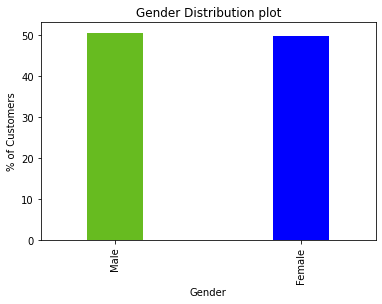

In [29]:
# 1. From the plot it is learnt that, nearly 50% of customers are male and remaining Female.
print("""Percentages of Male and Female """)
a = df["gender"].value_counts()*100/len(df)
print(a)
ax = (df["gender"].value_counts()*100/len(df)).plot(kind = "bar", color=['#67BB20',"b"], width = 0.3)
ax.set_xlabel("Gender")
ax.set_ylabel("% of Customers")
ax.set_title("Gender Distribution plot")


Count of  Senior Citizens(denoted by 1) and young group(denoted by 0)
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
 The percentage of youth = 83.79% and percentage of Senior Citizens = 16.21%


Text(0, 0.5, '% of Senior Citizens')

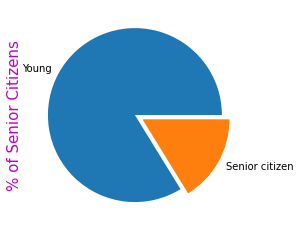

In [30]:
# 2. Most of customers in the dataset belong to young group and the count of senior citizens are very less than Young group.
#bx = (df.groupby(["SeniorCitizen"])["gender"].count()).plot.pie(explode=[0,0.1], labels=['Others',"Senior citizen"])
print("""Count of  Senior Citizens(denoted by 1) and young group(denoted by 0)""")
b = df["SeniorCitizen"].value_counts()
print(b)
print (" The percentage of youth = {:.2f}% and percentage of Senior Citizens = {:.2f}%".format(b[0]*100/(b[0]+b[1]),b[1]*100/(b[0]+b[1])))
bx = (df["SeniorCitizen"].value_counts()).plot.pie(explode=[0,0.1], labels=['Young',"Senior citizen"])
bx.set_ylabel("% of Senior Citizens", fontsize = 15, c = 'm')


Count of Churn of Customers from Telco
0    5174
1    1869
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Churn graph of Customers')

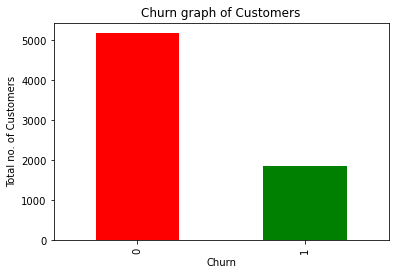

In [31]:
print("""Count of Churn of Customers from Telco""")
c = df["Churn"].value_counts()
print(c)
cx = (df["Churn"].value_counts()).plot(kind ='bar',color= ['r','g'])
cx.set_xlabel("Churn")
cx.set_ylabel("Total no. of Customers")
cx.set_title("Churn graph of Customers")

Percentage of Churn of Customers from Telco
0    73.463013
1    26.536987
Name: Churn, dtype: float64


Text(0.5, 1.0, 'Percentage of Churn of customers')

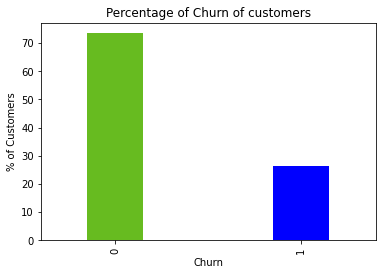

In [32]:
#3. Nearly 26.5% of Customers are churning from Telco because of different factors.
print("""Percentage of Churn of Customers from Telco""")
d = df["Churn"].value_counts()*100/len(df)
print(d)
dx = (df["Churn"].value_counts()*100/len(df)).plot(kind = "bar", color=['#67BB20',"b"], width = 0.3)
dx.set_xlabel("Churn")
dx.set_ylabel("% of Customers")
dx.set_title("Percentage of Churn of customers")

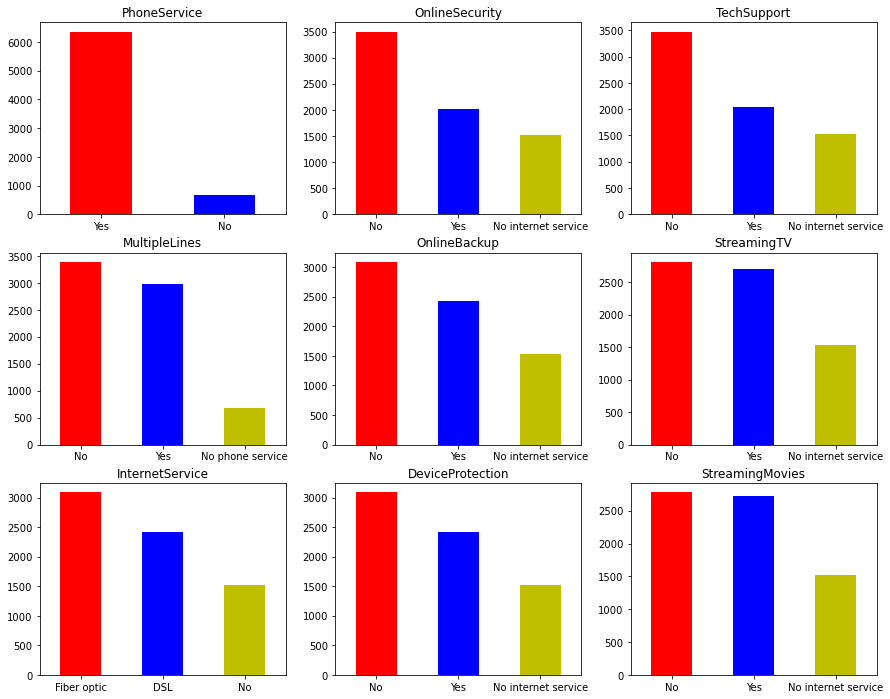

In [33]:
# 4. Shows various services provided by the Telco and observed that most of the customers opted for Fibreoptic services. The 
# telco provides less online security and Techsupport. Nearly 50% of the customers opted for Streaming TV and Streaming movies.
Facility = {1:'PhoneService',2:'MultipleLines',3:'InternetService',4:'OnlineSecurity',
           5:'OnlineBackup',6:'DeviceProtection',7:'TechSupport',8:'StreamingTV',9:'StreamingMovies'}

fig, axes = plt.subplots(3, 3,figsize = (15,12))
for i, item in Facility.items():
    if i <=3:
        Fx = df[item].value_counts().plot(kind = 'bar',rot=0,ax=axes[i-1,0], color = ['r','b','y'])
        Fx.set_title(item)
    elif i<=6:    
        Fx = df[item].value_counts().plot(kind = 'bar',ax=axes[i-4,1],rot=0, color = ['r','b','y'])
        Fx.set_title(item)
    elif i<=9:    
        Fx = df[item].value_counts().plot(kind = 'bar',ax=axes[i-7,2],rot=0, color = ['r','b','y'])
        Fx.set_title(item)
    

The no.of Customers based on Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Text(0.5, 1.0, 'No.of Customers based on Contract')

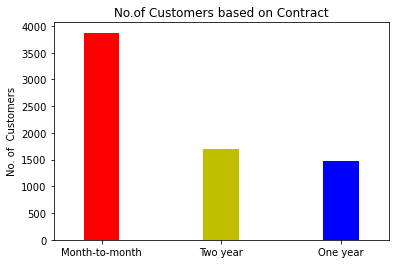

In [34]:
# 5. The Customers in the dataset preferred lower contract periods i.e Month-to-Month than two or three year Contract period.
print("The no.of Customers based on Contract")
g = df['Contract'].value_counts()
print(g)
gx = df['Contract'].value_counts().plot(kind = 'bar',color = ["r","y","b"], width = 0.3, rot=0)
gx.set_ylabel('No. of  Customers')
gx.set_title("No.of Customers based on Contract")

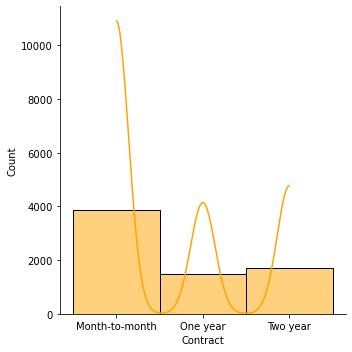

In [35]:
gx = sns.displot(df["Contract"], kde=True, bins=10 ,color = "orange")

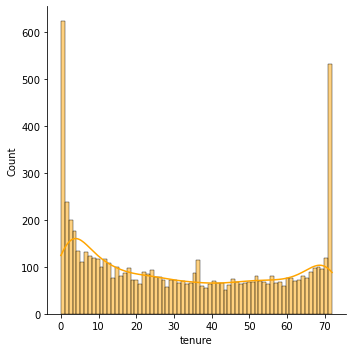

In [36]:
#6.The Customers in the dataset opted  mostly for one month tenure or 72 months tenure
hx = sns.displot(df['tenure'], kde=True, bins=70 ,color = "orange")

The count of churn in Male and Female
gender  Churn
Female  0        2549
        1         939
Male    0        2625
        1         930
dtype: int64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

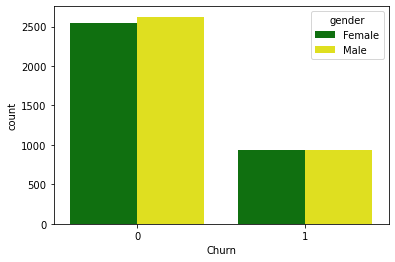

In [37]:
# 7.The count of churn in Male and Female is nearly same.
print("The count of churn in Male and Female")
i = df.groupby(['gender','Churn']).size()
print(i)
sns.countplot(df['Churn'], hue = df['gender'], dodge = True, palette = ['green', 'yellow'])   

The count of Churn of Seniorcitizens
SeniorCitizen  Churn
0              0        4508
               1        1393
1              0         666
               1         476
dtype: int64
The rate of churn in youth :  23.61%
The rate of churn in SeniorCitizens : 41.68%


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

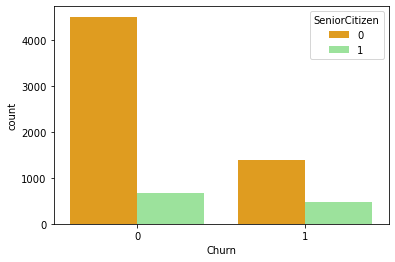

In [38]:
# 8.  The rate of Churn in SeniorCitizens are high than young group customers
print("The count of Churn of Seniorcitizens")
Sen_churn = (df.groupby(['SeniorCitizen','Churn']).size())
print(Sen_churn)
print("The rate of churn in youth :  {:.2f}%" .format(Sen_churn[0][1]*100/b[0]))
print("The rate of churn in SeniorCitizens : {:.2f}%" .format(Sen_churn[1][1]*100/b[1]))
sns.countplot(df['Churn'], hue = df['SeniorCitizen'], dodge = True, palette = ['orange', 'lightgreen'])   


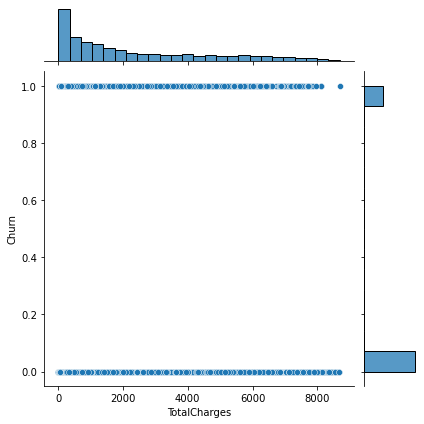

In [39]:
#9.
sns.jointplot(y = df['Churn'], x = df['TotalCharges'])

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

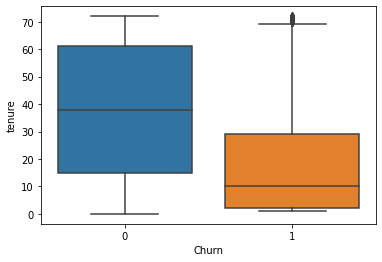

In [40]:
#10.The customers with lower tenure preferring to churn than the customers with high tenure.
sns.boxplot(x = df["Churn"], y = df["tenure"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

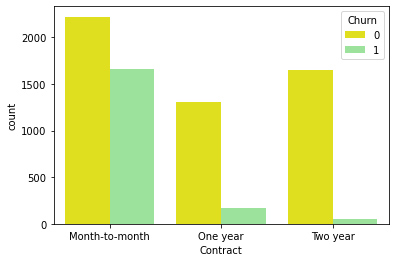

In [41]:
# 11.The churn count is high where customers opted for Month-to-Month contract than one year and two year contract.
sns.countplot(df['Contract'], hue = df['Churn'], dodge = True, palette = ['yellow', 'lightgreen'])   

Contract        Churn
Month-to-month  0        2220
                1        1655
One year        0        1307
                1         166
Two year        0        1647
                1          48
dtype: int64


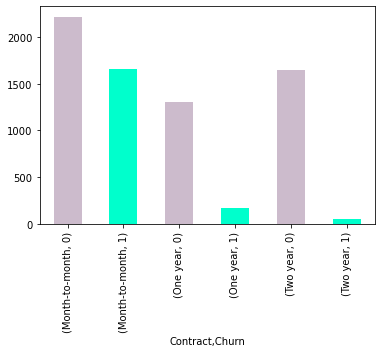

In [42]:
contract_churn = df.groupby(['Contract','Churn']).size()
print(contract_churn)
cc = (df.groupby(['Contract','Churn']).size()).plot.bar(color = ['#CCBBCC',"#00FFCC"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Partner', ylabel='count'>

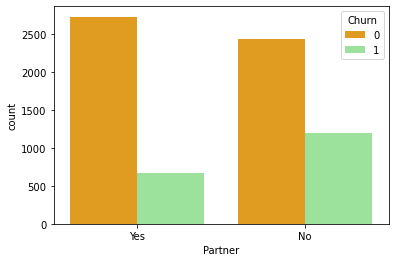

In [43]:
#12.
sns.countplot(df['Partner'], hue = df['Churn'], dodge = True, palette = ['orange', 'lightgreen'])   

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

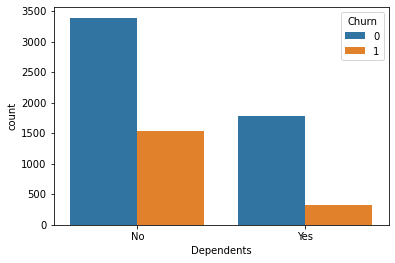

In [44]:
#13.
sns.countplot(df['Dependents'], hue = df['Churn'])   

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

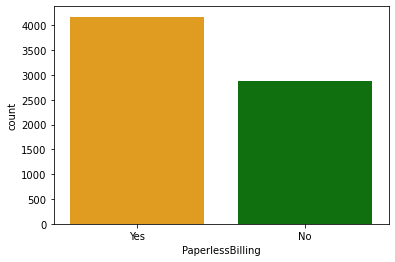

In [45]:
#14. The customers prefer paperless billing than paperbilling.
sns.countplot(df["PaperlessBilling"],dodge = True, palette = ['orange', 'green',"b","#CC00FF"], orient = "h")   

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

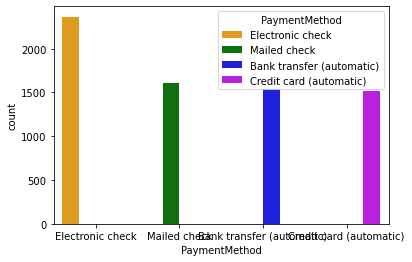

In [46]:
#15. The customers prefer Electronic check method than other payment methods.
sns.countplot(df["PaymentMethod"], hue = df["PaymentMethod"], dodge = True, palette = ['orange', 'green',"b","#CC00FF"], orient = "h")   

In [47]:
df.corr() # 

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.826176,-0.352229
MonthlyCharges,0.247900,1.000000,0.651170,0.193356
TotalCharges,0.826176,0.651170,1.000000,-0.198313
Churn,-0.352229,0.193356,-0.198313,1.000000


<AxesSubplot:>

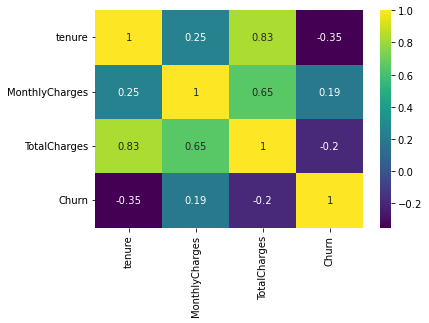

In [48]:
#16. The churn and tenure are inversely related. The customers with lower tenure prefer to churn than customers with long tenure
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

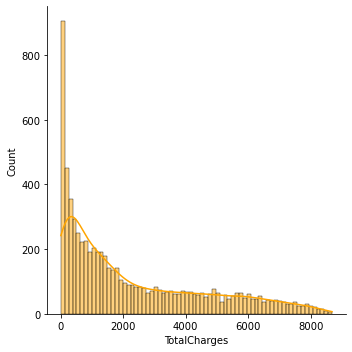

In [49]:
hx = sns.displot(df['TotalCharges'], kde=True, bins=70 ,color = "orange")